# Atlantica Online Batch Theory
###### By Tatsuo S.

In [1]:
import numpy as np
from numpy import isnan
import matplotlib.pyplot as plt
from collections import defaultdict

Defining a couple of functions to take care of the probability of getting various plus values on equipment. Value is given based on the amount of +3 that would be required to make the batch outcome. The higher this value, the better efficiency gained on material costs.

In [2]:
def probability_guess(batch_size, total_crafts):
    """
        Generates a random number based on crafting probabilities
        
        'batch_size' = size of the craft, between 1-20
        
        'total_crafts' = amount of crafts available
        
        'craft_value' = value of the synth in terms of +3 equips
        
        'plus_history' = array containing the results of synths
    """
    
    # creating arrays to hold the values
    plus_history = []
    craft_value = []
    
    # creating the counter based on batch size and total synths possible
    # turns the value into an integer since batches cannot be partial
    max_synths = int(total_crafts/batch_size)    
    
    
    for m in range(0,max_synths):
        # using random values to calculate equipment probabilities
        rando = np.random.randint(low=1, high=10000)
        if 1 <= rando and rando <= 6000:
            equip_plus = 3
        elif 6001 <= rando and rando <= 8000:
            equip_plus = 4
        elif 8001 <= rando and rando <= 9000:
            equip_plus = 5
        elif 9001 <= rando and rando <= 9500:
            equip_plus = 6
        elif 9501 <= rando and rando <= 9750:
            equip_plus = 7
        elif 9751 <= rando and rando <= 9900:
            equip_plus = 8
        elif 9901 <= rando and rando <= 9975:
            equip_plus = 9
        elif 9976 <= rando and rando <= 10000:
            equip_plus = 10

        # uses the equip's plus value to determine it's worth in base +3 gear components
        # the higher the synth value, the better the materials are maximized in material costs
        synth_value = equip_plus - 3
        craft_value.append((2**synth_value) * 3)
        plus_history.append(equip_plus)
        
        
    craft_value = np.mean(craft_value)
    return craft_value, plus_history

In [3]:
def print_results(total_crafts):

    """
        Returns the values of the batch, plus history, and the value
        of the result.
        
        'total_crafts' = amount of total crafts available
        
        'craft_value' = value of the synth in terms of +3 equips
        
        'plus_history' = array containing the results of synths
        
        'total_craft_value' = array containing the total values of each
                              batch size
    """

    total_craft_value = []
    craft_value = []
    plus_history = []
    
    # runs a loop to check each batch size, from 1 to 20
    # stores the results in an array, and prints to the screen
    for i in range(1,21):
        craft_value, plus_history = probability_guess(i,total_crafts)
        total_craft_value.append(craft_value)
        
    # converts NaN values to 0, due to batch size and max synths
    # not being equal
    total_craft_value = [0 if np.isnan(x) else x for x in total_craft_value]  
    return total_craft_value

This next cell sets the value for the number of test simulations or total amount of synths you can do. The total size is determined by your amount of materials on hand.

In [4]:
# creates the value of the maximum synths and test simulations
total_size = 100
tests = 100


This next cell runs the tests on each batch size to determine what the expected outcomes would be. Naturally, there is an upper limit to how large your batches can be as a result of your total size. 

In [9]:
# creates the total value array based on the batch value's size
batch_value = print_results(total_size)

# creates a dictionary to hold the lists for each plus value
test_lists = defaultdict(list)
norm_total_value = []

# runs a number of tests of each batch value size
for k in range(1,tests):
    
    total_value = [0] * len(batch_value)

    # running the random generator 100 times to find an expectation value
    # every value is held in the total value list
    # values are averaged against the number of tests
    batch_value = print_results(total_size)
    total_value = [sum(x) for x in zip(total_value, batch_value)]
    test_lists['test_' + str(k)].append(total_value)

This next cell takes the test results and arranges the results based on the batch size. For example, every 10 size batch will be placed in the `batch_size_10` list, and contain all `tests` values for every 10 batch.

In [10]:
# creating a new set of lists for the batch sizes
batch_lists = defaultdict(list)

# these sets of loops will create a series of lists containing the batch sizes.
# it then takes the values in each batch position from the test samples
# and appends them to the batch_lists for the total range of values for that
# particular batch size.
for counter in range(0,19):
    batch_name = 'batch_size_' + str(counter + 1)
    batch_lists[batch_name]

    for ys in range(1,tests):
        test_name = 'test_' + str(ys)
        batch_lists[batch_name].append(test_lists[test_name][0][counter])

# since all the values are normalized, we should  be able to see now if there is 
# a trend with batch sizes and total plus value.

This mess just shows the results of whatever parameters you set for testing.

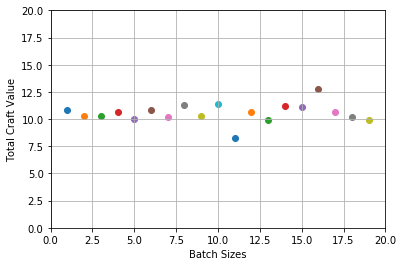

In [14]:
# plotting the results to see if trends arise
plt.scatter(1, np.mean(batch_lists['batch_size_1']), label='Size 1')
plt.scatter(2, np.mean(batch_lists['batch_size_2']), label='Size 2')
plt.scatter(3, np.mean(batch_lists['batch_size_3']), label='Size 3')
plt.scatter(4, np.mean(batch_lists['batch_size_4']), label='Size 4')
plt.scatter(5, np.mean(batch_lists['batch_size_5']), label='Size 5')
plt.scatter(6, np.mean(batch_lists['batch_size_6']), label='Size 6')
plt.scatter(7, np.mean(batch_lists['batch_size_7']), label='Size 7')
plt.scatter(8, np.mean(batch_lists['batch_size_8']), label='Size 8')
plt.scatter(9, np.mean(batch_lists['batch_size_9']), label='Size 9')
plt.scatter(10, np.mean(batch_lists['batch_size_10']), label='Size 10')
plt.scatter(11, np.mean(batch_lists['batch_size_11']), label='Size 11')
plt.scatter(12, np.mean(batch_lists['batch_size_12']), label='Size 12')
plt.scatter(13, np.mean(batch_lists['batch_size_13']), label='Size 13')
plt.scatter(14, np.mean(batch_lists['batch_size_14']), label='Size 14')
plt.scatter(15, np.mean(batch_lists['batch_size_15']), label='Size 15')
plt.scatter(16, np.mean(batch_lists['batch_size_16']), label='Size 16')
plt.scatter(17, np.mean(batch_lists['batch_size_17']), label='Size 17')
plt.scatter(18, np.mean(batch_lists['batch_size_18']), label='Size 18')
plt.scatter(19, np.mean(batch_lists['batch_size_19']), label='Size 19')
plt.scatter(20, np.mean(batch_lists['batch_size_20']), label='Size 20')

plt.ylim(0,20)
plt.xlim(0,20)
plt.xlabel('Batch Sizes')
plt.ylabel('Total Craft Value')
plt.grid()